**NIFTY 50 FORECASTING USING ANN**

This program aims to make a model that is able to forecast nifty 50 index's next closing price given the previous 60 closing prices. To achieve this an Artificial neural network with four layers have been used. First two layers are LSTM layers with 50 neurons each and the other two layers are DENSE layers with 25 and 1 neuron each. The optimizer used is 'adam' and the loss function which the model tries to optimize is 'mean_squared_error'. 

Nifty 50 data is taken from Yahoo's Api using the ticker symbol *'^NSEI'*  for the period of 1 jan 2012 to 15 April 2020. There are 2022 data points for the nifty index, out of which eighty percent of data is used to train the model and the rest is used as a validation set to compare the predictions and actual data and to find other efficiency criterias like root mean squared error(rmse).

The program also has visualizations forecasted and actual prices.

.




In [4]:
#importing the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [0]:
#Get the index quote from yahoo for the duration starting 1 jan 2012 to 15 april 2020
df = web.DataReader( '^NSEI',data_source='yahoo',start='2012-01-01',end='2020-04-15')

In [6]:
#show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,4773.100098,4675.799805,4675.799805,4765.299805,0.0,4765.299805
2012-01-04,4782.850098,4728.850098,4774.950195,4749.649902,0.0,4749.649902
2012-01-05,4779.799805,4730.149902,4749.000000,4749.950195,0.0,4749.950195
2012-01-06,4794.899902,4686.850098,4724.149902,4754.100098,0.0,4754.100098
2012-01-09,4758.700195,4695.450195,4747.549805,4742.799805,0.0,4742.799805
...,...,...,...,...,...,...
2020-04-08,9131.700195,8653.900391,8688.900391,8748.750000,896500.0,8748.750000
2020-04-09,9128.349609,8904.549805,8973.049805,9111.900391,742100.0,9111.900391
2020-04-13,9112.049805,8912.400391,9103.950195,8993.849609,644000.0,8993.849609


In [0]:
#Creating a new dataframe with just the closing price of index
data = df.filter(['Close'])

In [8]:
#show the data
data

,Close
Date,
2012-01-03,4765.299805
2012-01-04,4749.649902
2012-01-05,4749.950195
2012-01-06,4754.100098
2012-01-09,4742.799805
...,...
2020-04-08,8748.750000
2020-04-09,9111.900391
2020-04-13,8993.849609


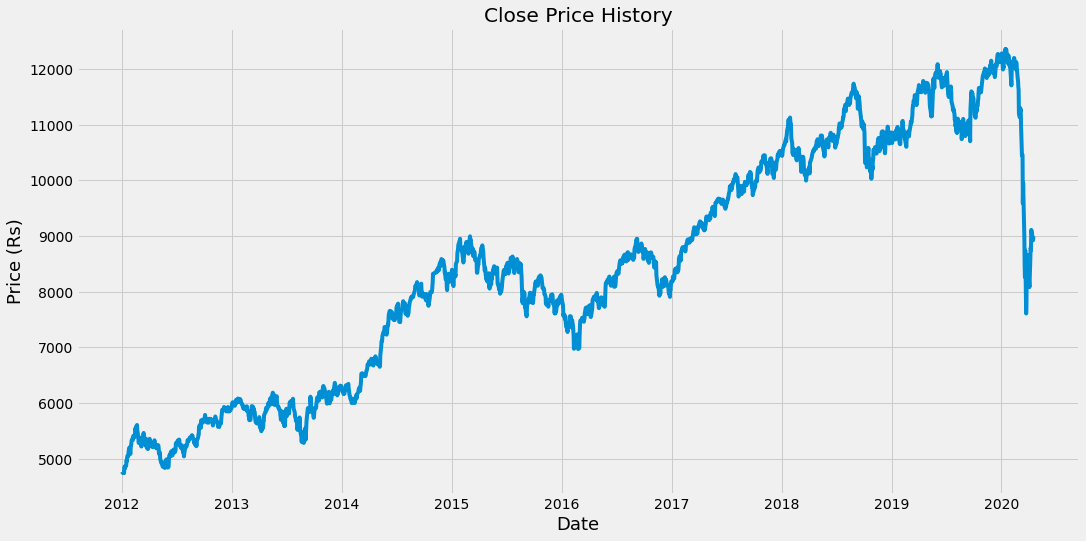

In [9]:
#Visualize the closing price history
plt.style.use('fivethirtyeight')
plt.figure(figsize = (16,8))
plt.title('Close Price History')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price (Rs)',fontsize=18)
plt.plot(data['Close'])
plt.show()

In [0]:
#convert the dataframe into a numpy array
dataset= data.values

In [11]:
dataset

array([[4765.29980469],
       [4749.64990234],
       [4749.95019531],
       ...,
       [8993.84960938],
       [8925.29980469],
       [8992.79980469]])

In [12]:
#scale the data
scaler= MinMaxScaler(feature_range=(0,1))
scaled_data= scaler.fit_transform(dataset)
scaled_data

array([[0.00295295],
       [0.00089902],
       [0.00093843],
       ...,
       [0.55791716],
       [0.54892053],
       [0.55777938]])

In [13]:
#Split the data for training and testing/validation sets. Using 80 percent data for training
training_data_len= math.ceil(len(scaled_data)*0.8)
training_data_len

1619

In [0]:
#creating the training data set
train_data= scaled_data[0:training_data_len,:]

In [0]:
#split the data into x_train and y_train 
#as these will act as the independent and dependent variable respectably
#creating empty lists
x_train=[]
y_train=[]
#using previous 60 days data to predict the next price
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [0]:
#X_train is an array in which one element is the closing price of 60 consecutive days for the index 
#x_train REMOVE HASH

In [0]:
#y_train REMOVE HASH

In [18]:
#Convert x_train and y_train into numpy arrays
x_train, y_train= np.array(x_train),np.array(y_train)
#reshape the independent variable so that it can be used in ann model
x_train= np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1559, 60, 1)

In [0]:
#Build the model for neural network
model = Sequential()

In [0]:
#add layers to the model
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [0]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [22]:
#training or fitting the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

Epoch 1/1
1559/1559 [==============================] - 65s 41ms/step - loss: 0.0013


In [23]:
#creating a testing data set
test_data= scaled_data[training_data_len- 60:, : ]
#training set had 1618 observations therefore testing set should have 2022-1618+60 observations
len(test_data)

464

In [0]:
#creating the independent and dependent variables for test data set
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [25]:
len(x_test)

404

In [26]:
#converting the data to a numpy array
x_test= np.array(x_test)
x_test.shape

(404, 60)

In [27]:
#reshape the data
x_test= np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(404, 60, 1)

In [28]:
#Get the model's predicted price values for the validation set
predictions = model.predict(x_test)
len(predictions)

404

In [29]:
#Descale the predicted index prices
predictions = scaler.inverse_transform(predictions)
len(predictions)

404

In [30]:
#Get the Root mean squared error or RMSE for the model to check the efficiency of the model
rmse= np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

274.7961721059006

In [31]:
#variables used for plotting the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['predictions']= predictions


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


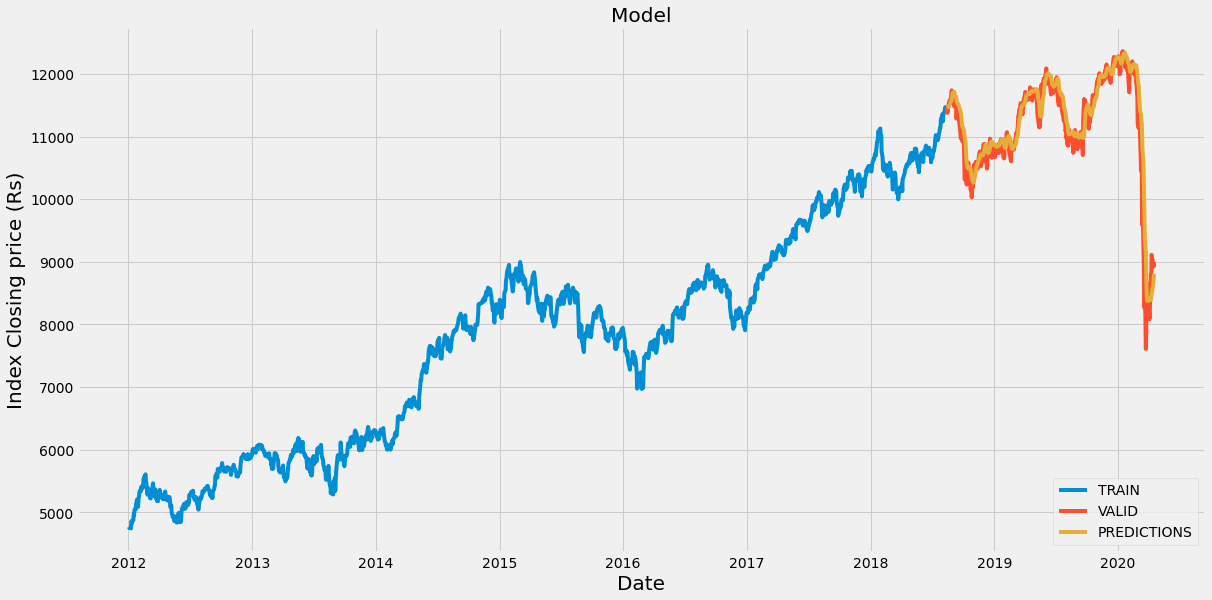

In [32]:
#visualize the data
plt.figure(figsize=(18,9))
plt.title('Model')
plt.xlabel('Date',fontsize=20)
plt.ylabel('Index Closing price (Rs)',fontsize=20)
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['TRAIN','VALID','PREDICTIONS'],loc='lower right')
plt.show()

In [33]:
valid

,Close,predictions
Date,,
2018-08-13,11355.750000,11463.679688
2018-08-14,11435.099609,11466.621094
2018-08-16,11385.049805,11472.165039
2018-08-17,11470.750000,11471.136719
2018-08-20,11551.750000,11478.123047
...,...,...
2020-04-08,8748.750000,8432.788086
2020-04-09,9111.900391,8497.541016
2020-04-13,8993.849609,8610.498047


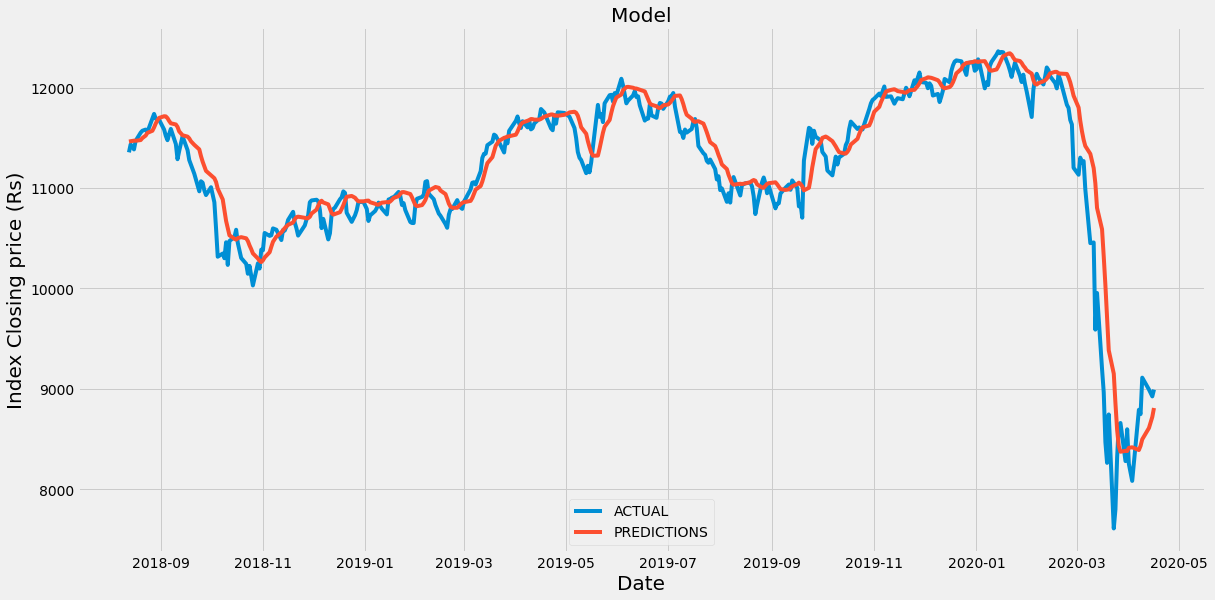

In [34]:
plt.figure(figsize=(18,9))
plt.title('Model')
plt.xlabel('Date',fontsize=20)
plt.ylabel('Index Closing price (Rs)',fontsize=20)
plt.plot(valid[['Close','predictions']])
plt.legend(['ACTUAL','PREDICTIONS'],loc='lower center')
plt.show()